In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

# Train Test Split
It's fast to implement but still suffers from a problem  
High Variance based on partition of Train and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 4)

## Logistic Regression

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

## KNN

### K = 5

In [7]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.96666666666666667

### K = 1

In [8]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.94999999999999996

# Locating better value of K

In [9]:
k_range = range(1, 26)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

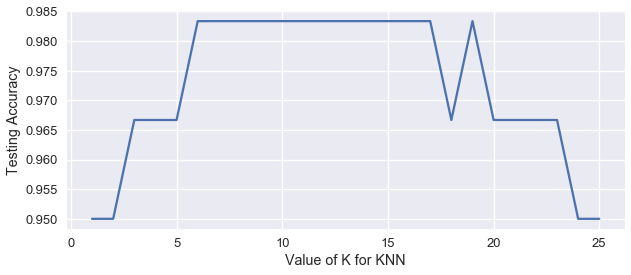

In [10]:
sns.set_context('talk')

plt.figure(figsize = (10, 4))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

> It's best to choose a higher value for K, because it'll yield less complicated model

# Retraining with Best K
And instead of wasting data by separating into 2 sets,  
this time training is done on the whole set

In [11]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X, y)
knn.predict([[3, 5, 4, 2], [5, 4, 3, 2]])

array(['versicolor', 'versicolor'], dtype=object)